# Internal Point Method
In thi notebook we test the various implementation of the interior point method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from plot import plot_LP, plot_QP, plot_LMOP
from problem import LPProblem, QPProblem, LMOPProblems

## Linear Programming

the problem:

In [2]:
# LP problem
A = np.array(
    [[ 2,  1],
     [ 2,  3],
     [ 4,  3],
     [-1, -2]], dtype=np.float64)
b = np.array([120, 210, 270, -60], dtype=np.float64)
c = np.array([-10, -14], dtype=np.float64)

# standard form
A_std = np.hstack([A, np.eye(A.shape[0])])
c_std = np.concatenate((c, np.zeros((A.shape[0],))))

LP = LPProblem(A_std, b, c_std)

run the algorithm:

In [3]:
x, lam, s, converge, n_iter, steps = LP.internal_point(tolerance=1e-8)

A (4, 6):
[[ 2.  1.  1.  0.  0.  0.]
 [ 2.  3.  0.  1.  0.  0.]
 [ 4.  3.  0.  0.  1.  0.]
 [-1. -2.  0.  0.  0.  1.]]
b (4,):
[120. 210. 270. -60.]
c (6,):
[-10. -14.   0.   0.   0.   0.]
lo (6,):
[-inf -inf -inf -inf -inf -inf]
hi (6,):
[inf inf inf inf inf inf]
--------------------------------------------------------------------------------
iter [0]:
x:	[56.55466879 41.12609737 13.69752594 45.41181165 16.26895451 54.84038308],
lam:	[-0.05714286 -2.11428571 -1.14285714  1.57142857],
s:	[4.02142857 2.50714286 3.59285714 5.65       4.67857143 1.96428571]
--------------------------------------------------------------------------------
iter [1]:
x:	[29.12490977 47.94152054 13.80865992  7.92561884  9.6757993  65.00795085],
lam:	[ 0.21116952 -3.18487417 -1.13814918  0.41914872],
s:	[1.35794632 0.03498957 0.22762206 3.62366576 1.57694076 0.01964286]
--------------------------------------------------------------------------------
iter [2]:
x:	[27.03821249 51.94810627 13.97546874  0.07925619 

In [4]:
if converge:
    x = x[:A.shape[1]]
    solution = np.sum(c * x)
    print(f'The Algorithm is converged after {n_iter} iterations.\n' \
          f'The Optimal solution is {solution}')
else:
    print("The Algorithm is not converged to a solution!")

The Algorithm is converged after 4 iterations.
The Optimal solution is -999.9999972703027


plot the results:

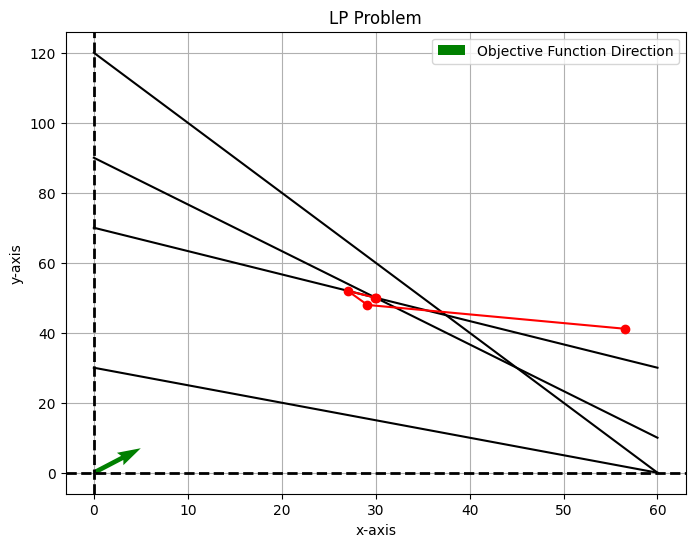

In [5]:
plot_LP(A, b, c, steps, max_scale=60)

## Quadratic Programming

the problem:

In [6]:
# QP problem 
Q = np.array(
    [
        [ 1, -1],
        [-1,  2]
    ], dtype=np.float64)
A = np.array(
    [[ 1,  1],
     [-1,  2],
     [ 2,  1]], dtype=np.float64)
b = np.array([2, 2, 3], dtype=np.float64)
c = np.array([-2, -6], dtype=np.float64)

# standard form
A_std = np.hstack([A, np.eye(A.shape[0])])
c_std = np.concatenate((c, np.zeros((A.shape[0],))))
Q_std = np.pad(Q, (0, A.shape[0]), 'constant', constant_values=0)

QP = QPProblem(A_std, b, c_std, Q_std)

run the algorithm:

In [7]:
x, lam, s, converge, n_iter, steps = QP.internal_point(tolerance=1e-8)

Problem size: 3, 5
A (3, 5):
[[ 1.  1.  1.  0.  0.]
 [-1.  2.  0.  1.  0.]
 [ 2.  1.  0.  0.  1.]]
b (3,):
[2. 2. 3.]
c (5,):
[-2. -6.  0.  0.  0.]
Q (5, 5):
[[ 1. -1.  0.  0.  0.]
 [-1.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
lo (5,):
[-inf -inf -inf -inf -inf]
hi (5,):
[inf inf inf inf inf]
--------------------------------------------------------------------------------
iter [0]:
x:	[0.87540488 1.37540488 0.31290488 0.50040488 0.62540488],
lam:	[-0.8515625  -0.87890625 -1.12630208],
s:	[1.02311198 0.72102865 2.14941406 2.17675781 2.42415365]
0.0013526019805675045
--------------------------------------------------------------------------------
iter [1]:
x:	[0.73248494 1.26824635 0.00312905 0.1985658  0.27193089],
lam:	[-1.72921277 -0.81204121 -0.8148946 ],
s:	[0.05102494 0.00721029 1.76820318 0.85103162 0.85388501]
0.0
0.002079954168917295
--------------------------------------------------------------------------------
iter [2]:
x:	[0.680

In [8]:
if converge:
    x = x[:A.shape[1]]
    solution = np.sum(x @ c + 0.5 * x.T @ Q @ x)
    print(f'The Algorithm is converged after {n_iter} iterations.\n' \
          f'The Optimal solution is {solution} with x: {x}')
else:
    print("The Algorithm is not converged to a solution!")

The Algorithm is converged after 5 iterations.
The Optimal solution is -8.222222221790368 with x: [0.66666667 1.33333333]


plot the results:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


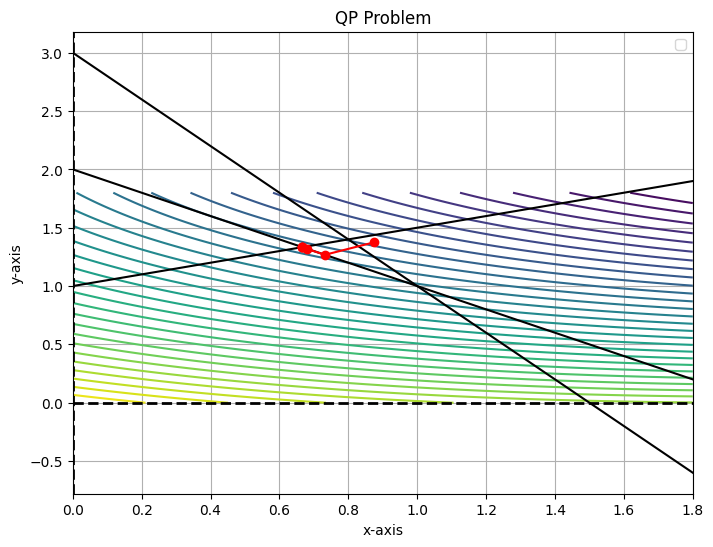

In [9]:
plot_QP(A, b, c, Q, steps, max_scale=1.8)

## Lexicographic MOQP

The problem:

In [10]:
sorted_obj = [
    {
        "c": np.array([0, -100]),
        "Q": np.array([
                        [ 1, -10],
                        [-1,  2]
                    ], dtype=np.float64)
    },
    {
        "c": np.array([-5, 0]),
        "Q": None
    },
]

# constraints
A = np.array(
    [[ 1,  0],
     [ 0,  1]], dtype=np.float64)
b = np.array([10, 5], dtype=np.float64)

LMOP = LMOPProblems(A, b, sorted_obj)

Algorithm with tangent approach:

In [11]:
x, lam, s, converge, n_iter, steps = LMOP.internal_point_preemptive(tolerance=1e-8, max_it=100)

Objective function sorted:
[#1]
linear
[   0 -100]
quadratic
[[  1. -10.]
 [ -1.   2.]]
[#2]
linear
[-5  0]
quadratic
None
A (2, 4):
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]]
b (2,):
[10.  5.]
lo ():
-inf
hi ():
inf
--------------------------------------------------------------------------------
Solving #1 objective
--------------------------------------------------------------------------------
iter [0]:
x:	[6.875 4.375 6.875 4.375],
lam:	[-10. -50.],
s:	[102.5  62.5 122.5 162.5]
0.0
0.16251720463444164
--------------------------------------------------------------------------------
iter [1]:
x:	[6.34431431 4.08723234 3.65568569 0.91276766],
lam:	[-27.75684614 -90.95554885],
s:	[ 2.22686835  0.625      35.72578566 98.92448837]
0.0
0.003534074931736857
--------------------------------------------------------------------------------
iter [2]:
x:	[9.96344314 4.94330752 0.03655686 0.05669248],
lam:	[ -40.68431501 -100.23904485],
s:	[8.81676750e-01 3.37092630e-02 4.06843150e+01 1.00239045e+02]
1.4583

In [12]:
if converge:
    x = x[:A.shape[1]]
    solution = 0
    for obj in sorted_obj:
        solution += np.sum(x @ obj['c'][:A.shape[1]])
        
    print(f'The Algorithm is converged after {n_iter} iterations.\n' \
        f'The Optimal solution is {solution} with x: {x}')
else:
    print("The Algorithm is not converged to a solution!")

The Algorithm is converged after 9 iterations.
The Optimal solution is -550.000000278116 with x: [10.  5.]


Plot of the algorithm:

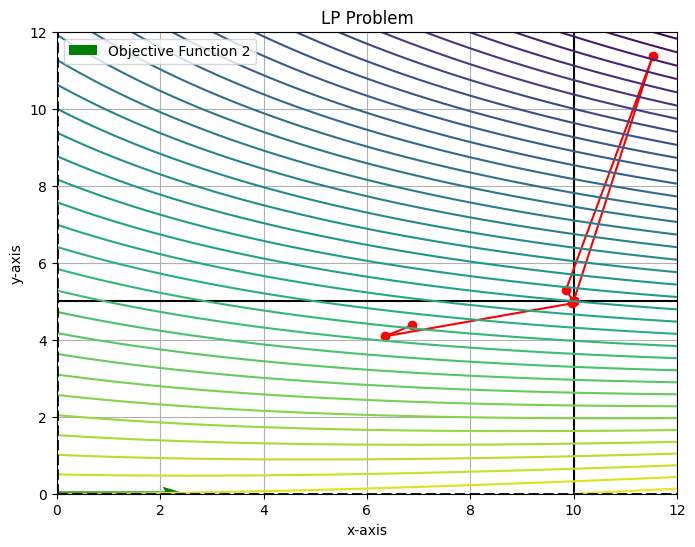

In [13]:
plot_LMOP(A, b, sorted_obj, steps, max_scale=12)

### Test of tangent method:

Kite problem

In [14]:
sorted_obj = [
    {
        "c": np.array([-8, -12]),
        "Q": None
    },
    {
        "c": np.array([-14, -10]),
        "Q": None
    },
]

A = np.array(
    [[ 2,  1],
     [ 2,  3],
     [ 4,  3],
     [-1, -2]], dtype=np.float64)
b = np.array([120, 210, 270, -60], dtype=np.float64)

# A_std = np.hstack([A, np.eye(A.shape[0])])

LMOP = LMOPProblems(A, b, sorted_obj)

x, lam, s, converge, n_iter, steps = LMOP.internal_point_preemptive(tolerance=1e-8, max_it=100)

Objective function sorted:
[#1]
linear
[ -8 -12]
quadratic
None
[#2]
linear
[-14 -10]
quadratic
None
A (4, 6):
[[ 2.  1.  1.  0.  0.  0.]
 [ 2.  3.  0.  1.  0.  0.]
 [ 4.  3.  0.  0.  1.  0.]
 [-1. -2.  0.  0.  0.  1.]]
b (4,):
[120. 210. 270. -60.]
lo ():
-inf
hi ():
inf
--------------------------------------------------------------------------------
Solving #1 objective
--------------------------------------------------------------------------------
iter [0]:
x:	[56.8099223  41.38135087 13.95277944 45.66706515 16.52420801 55.09563658],
lam:	[ 0.05714286 -1.88571429 -0.85714286  1.42857143],
s:	[3.72857143 2.24285714 3.15714286 5.1        4.07142857 1.78571429]
--------------------------------------------------------------------------------
iter [1]:
x:	[28.42543205 48.4473696  14.7017663   7.8070271  10.956163   65.32017125],
lam:	[ 0.2636952  -2.88888533 -0.81625257  0.38617313],
s:	[1.30559391 0.028095   0.14033507 3.2929156  1.22028284 0.01785714]
---------------------------------

In [15]:
if converge:
    x = x[:A.shape[1]]
    solution = 0
    for obj in sorted_obj:
        solution += np.sum(x @ obj['c'][:A.shape[1]])
        
    print(f'The Algorithm is converged after {n_iter} iterations.\n' \
        f'The Optimal solution is {solution} with x: {x}')
else:
    print("The Algorithm is not converged to a solution!")

The Algorithm is converged after 8 iterations.
The Optimal solution is -1760.0000001727549 with x: [30.00000004 49.99999997]


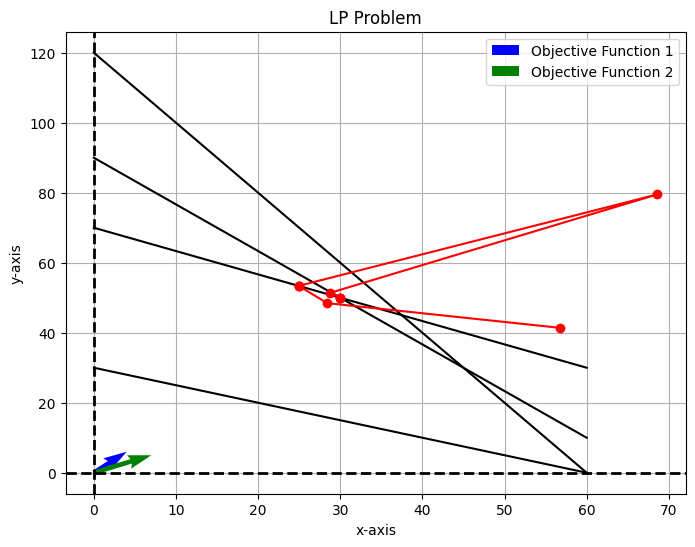

In [16]:
plot_LMOP(A, b, sorted_obj, steps, max_scale=60)

Pyramid and cylinder

In [17]:
sorted_obj = [
    {
        "c": np.array([-16, -16, -16]),
        "Q": np.array([
            [10, -2, 4],
            [-2, 10, 4],
            [ 4,  4, 4]
        ])
    },
    {
        "c": np.array([-1, -1, 0]),
        "Q": None
    },
]

A = np.array(
    [[-1,  1,  1],
     [-1, -1,  1],
     [ 1, -1,  1],
     [ 1,  1,  1],
     [ 0,  0, -1]], dtype=np.float64)
b = np.array([1, 1, 1, 3, 0], dtype=np.float64)

LMOP = LMOPProblems(A, b, sorted_obj)

x, lam, s, converge, n_iter, steps = LMOP.internal_point_preemptive(tolerance=1e-8, max_it=100)

Objective function sorted:
[#1]
linear
[-16 -16 -16]
quadratic
[[10 -2  4]
 [-2 10  4]
 [ 4  4  4]]
[#2]
linear
[-1 -1  0]
quadratic
None
A (5, 8):
[[-1.  1.  1.  1.  0.  0.  0.  0.]
 [-1. -1.  1.  0.  1.  0.  0.  0.]
 [ 1. -1.  1.  0.  0.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  1.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  1.]]
b (5,):
[1. 1. 1. 3. 0.]
lo ():
-inf
hi ():
inf
--------------------------------------------------------------------------------
Solving #1 objective
--------------------------------------------------------------------------------
iter [0]:
x:	[0.70731707 0.70731707 1.30731707 0.30731707 1.10731707 0.30731707
 1.50731707 1.30731707],
lam:	[-1.46666667  2.05333333 -1.46666667 -4.98666667  1.46666667],
s:	[2.86       2.86       3.15333333 6.08666667 2.56666667 6.08666667
 9.60666667 3.15333333]
5.391692146628496e-16
0.05813194242621328
--------------------------------------------------------------------------------
iter [1]:
x:	[0.91622345 0.91622345 0.79389988 0.206100

In [18]:
if converge:
    x = x[:A.shape[1]]
    solution = 0
    for obj in sorted_obj:
        solution += np.sum(x @ obj['c'][:A.shape[1]])
        
    print(f'The Algorithm is converged after {n_iter} iterations.\n' \
        f'The Optimal solution is {solution} with x: {x}')
else:
    print("The Algorithm is not converged to a solution!")

The Algorithm is converged after 9 iterations.
The Optimal solution is -51.00000000749429 with x: [1.50000000e+00 1.50000000e+00 2.68322702e-09]


Pyramid and two quadratic functions:

In [19]:
sorted_obj = [
    {
        "c": np.array([-1, -1, -1]),
        "Q": None
    },
    {
        "c": np.array([-5, -5, 0]),
        "Q": np.array([
            [2, 2, 0],
            [2, 2, 0],
            [0, 0, 4]
        ])
    },
    {
        "c": np.array([-5, -3, 2]),
        "Q": np.array([
            [4, 0, 0],
            [0, 4, 0],
            [0, 0, 0]
        ])
    },
]

A = np.array(
    [[-1,  1,  1],
     [-1, -1,  1],
     [ 1, -1,  1],
     [ 1,  1,  1],
     [ 0,  0, -1]], dtype=np.float64)
b = np.array([1, 1, 1, 3, 0], dtype=np.float64)

LMOP = LMOPProblems(A, b, sorted_obj)

x, lam, s, converge, n_iter, steps = LMOP.internal_point_preemptive(tolerance=1e-10, max_it=100)

Objective function sorted:
[#1]
linear
[-1 -1 -1]
quadratic
None
[#2]
linear
[-5 -5  0]
quadratic
[[2 2 0]
 [2 2 0]
 [0 0 4]]
[#3]
linear
[-5 -3  2]
quadratic
[[4 0 0]
 [0 4 0]
 [0 0 0]]
A (5, 8):
[[-1.  1.  1.  1.  0.  0.  0.  0.]
 [-1. -1.  1.  0.  1.  0.  0.  0.]
 [ 1. -1.  1.  0.  0.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  1.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  1.]]
b (5,):
[1. 1. 1. 3. 0.]
lo ():
-inf
hi ():
inf
--------------------------------------------------------------------------------
Solving #1 objective
--------------------------------------------------------------------------------
iter [0]:
x:	[0.70731707 0.70731707 1.30731707 0.30731707 1.10731707 0.30731707
 1.50731707 1.30731707],
lam:	[-0.16666667  0.23333333 -0.16666667 -0.56666667  0.16666667],
s:	[0.325      0.325      0.35833333 0.69166667 0.29166667 0.69166667
 1.09166667 0.35833333]
--------------------------------------------------------------------------------
iter [1]:
x:	[1.09812263 1.09812263 0.82509742 0

In [20]:
if converge:
    x = x[:A.shape[1]]
    solution = 0
    for obj in sorted_obj:
        solution += np.sum(x @ obj['c'][:A.shape[1]])
        
    print(f'The Algorithm is converged after {n_iter} iterations.\n' \
        f'The Optimal solution is {solution} with x: {x}')
else:
    print("The Algorithm is not converged to a solution!")

The Algorithm is converged after 18 iterations.
The Optimal solution is -28.666655779964387 with x: [1.66666617 1.16666617 0.16666766]


## Penalty approach
The idea of this approach is to fix the matrix A and vector b and rewrite the objective functions with penalities.

In [21]:
sorted_obj = [
    {
        "c": np.array([0, -10]),
        "Q": np.array([
                        [ 1, -10],
                        [-1,  2]
                    ], dtype=np.float64)
    },
    {
        "c": np.array([-5, 0]),
        "Q": None
    },
]

A = np.array(
    [[ 1,  0],
     [ 0,  1]], dtype=np.float64)
b = np.array([10, 5], dtype=np.float64)

LMOP = LMOPProblems(A, b, sorted_obj)

In [22]:
x, lam, s, converge, n_iter, steps = LMOP.internal_point_penality(tolerance=1e-8, max_it=100)

Objective function sorted:
[#1]
linear
[  0. -10.   0.   0.   0.]
quadratic
[[  1. -10.   0.   0.   0.]
 [ -1.   2.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]
[#2]
linear
[-5.  0.  0.  0.  0.]
quadratic
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
A (2, 5):
[[1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]]
b (2,):
[10.  5.]
lo ():
-inf
hi ():
inf
5
[  0. -10.   0.   0.   0.]
[[  1. -10.   0.   0.   0.]
 [ -1.   2.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]
(5,) (5, 5)
--------------------------------------------------------------------------------
iter [0]:
x:	[6.5 4.  6.5 4.  1.5],
lam:	[-10.  -5.],
s:	[12.5 17.5 32.5 27.5 22.5]
[[ 0.   0.   1.   0.   1.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   1.   0.   1.   0.   0.   0.   0.   0.   0. ]
 [ 1.   0.  -1.  10.  -0.  -0.  -0.   1.   0.   0.   0.   0. ]
 [ 0.   1.   1.  -2.  -0

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
if converge:
    x = x[:A.shape[1]]
        
    print(f'The Algorithm is converged after {n_iter} iterations.\n' \
        f'The Optimal solution is with x: {x}')
else:
    print("The Algorithm is not converged to a solution!")

The Algorithm is converged after 8 iterations.
The Optimal solution is with x: [10.  5.]


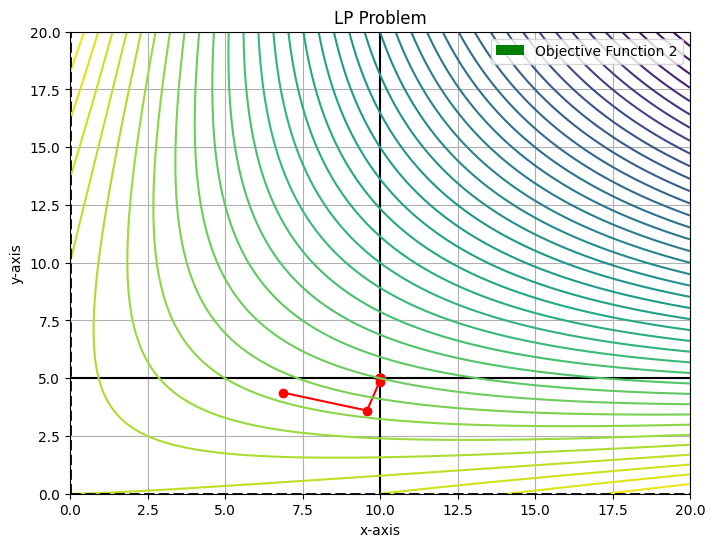

In [ ]:
plot_LMOP(A, b, sorted_obj, steps, max_scale=20)